In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv('data/raw_sales2.csv')
df.head(2)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3


In [4]:
# Function to detection outlier on one-dimentional datasets

def outlier_remove(data):
    anomalies = []
    
    data_mean = statistics.mean(data) # meu -> mean
    data_std = statistics.stdev(data) # sigma value
    
    cut_off = data_std * 3
    
    lower_limit = data_mean - cut_off # 3-s*3
    upper_limit = data_mean + cut_off # 3+s*3
    
    for outlier in data:
        if outlier < lower_limit or outlier > upper_limit:
            anomalies.append(outlier)
            
    return anomalies

In [5]:
list1 = outlier_remove(df['price'])
len(list1)

461

In [7]:
len(df['price'])

29580

In [8]:
df.price.skew()

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

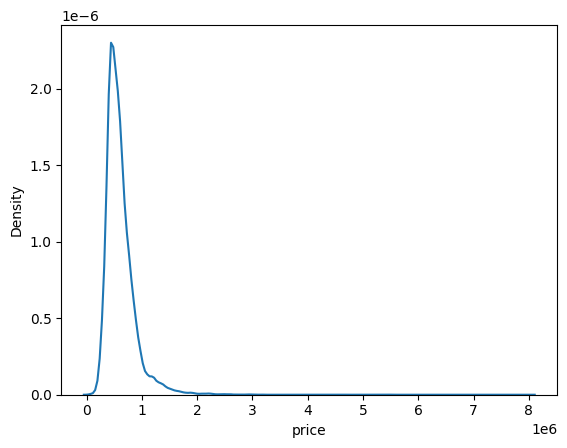

In [10]:
sns.kdeplot(df.price)

### Right-skewed	log(x), sqrt(x)
### Left-skewed	x², x³, exp(x)

In [11]:
df['Price_transformed'] = np.log(df.price)

In [12]:
df.Price_transformed.skew()

np.float64(0.4731646269984763)

In [13]:
list_2 = outlier_remove(df['Price_transformed'])
len(list_2)

266

<Axes: xlabel='Price_transformed', ylabel='Density'>

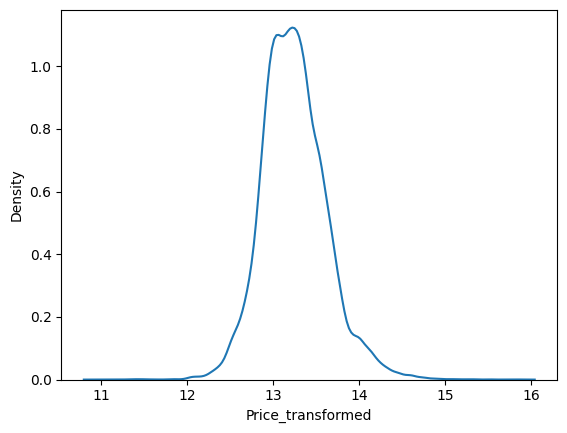

In [14]:
sns.kdeplot(df.Price_transformed)

In [15]:
df['Price_transformed_double'] = np.log(df.Price_transformed)

In [16]:
df['Price_transformed_double'].skew()

np.float64(0.33092530655758573)

In [17]:
list3 = outlier_remove(df['Price_transformed_double'])
len(list3)

251

<Axes: xlabel='Price_transformed_double', ylabel='Density'>

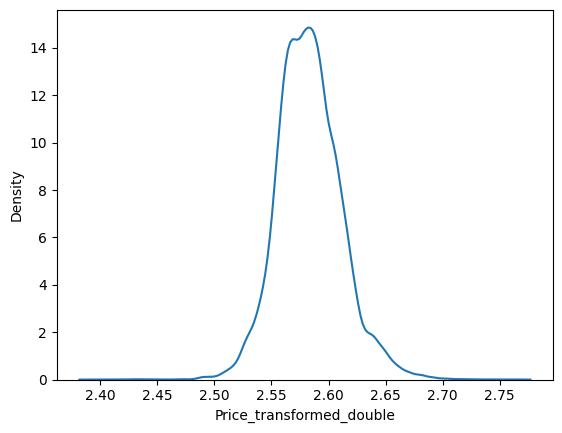

In [18]:
sns.kdeplot(df.Price_transformed_double)

### Boxplot

<Axes: >

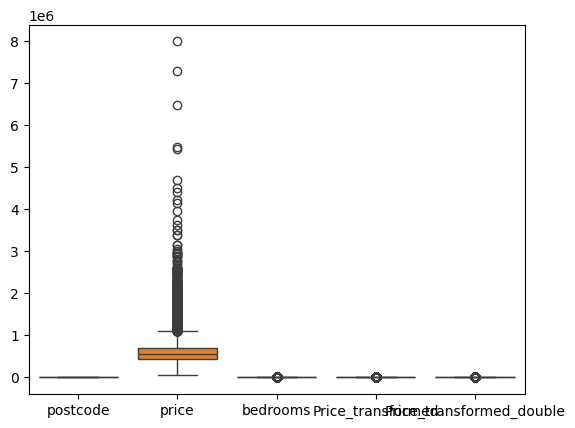

In [19]:
sns.boxplot(data=df)

#### It consider above 75 or below ~ -35 to be outlier. the result are very close to method 1 above

In [20]:
df.describe()

,postcode,price,bedrooms,Price_transformed,Price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


### Inter Quartile Range

In [21]:
list1 = [96, 81, 54, 89, 75, 48, 55, 90, 86, 60, 97, 46, 91, 63, 71, 78, 94, 66, 59, 69, 52, 87, 98, 84, 73]
len(list1)

25

In [22]:
max(list1)

98

In [23]:
min(list1)

46

In [24]:
statistics.mean(list1)

74.48

In [27]:
list2 = sorted(list1)
list2

[46,
 48,
 52,
 54,
 55,
 59,
 60,
 63,
 66,
 69,
 71,
 73,
 75,
 78,
 81,
 84,
 86,
 87,
 89,
 90,
 91,
 94,
 96,
 97,
 98]